## Chapter 5: Model-Free Control

From the value function of unknown MDP estimated by model-free prediction algorithms, we can approximate optimal policies for the MDP. 

Model-free control algorithms can be divided into two groups: on-policy control and off-policy control.

- **On-policy control**: Learn about policy $\pi$ from experience sampled from $\pi$

- **Off-policy control**: Learn about policy from $\pi$ from experience sampled from policy $\mu \neq \pi$ 

Both type of control algorithms are widely utilized in RL.

### On-policy Monte-Carlo Control

The overall idea of model-free control is to proceed the same pattern as the  **Generalized Policy Iteration** -> iteration of policy evaluation and policy improvement. 

For policy evaluation algorithm, Monte-Carlo policy evaluation can be used, and for policy improvement algorithm, **greedy policy improvement** can be used.

</br>
</br>
<font size="3">
$$\begin{align}
Q(S_t, A_t) = Q(S_t, A_t) + \alpha(G_t - Q(S_t, A_t))
\end{align}$$
</font>

</br>
</br>
<font size="3">
$$\begin{align}
\pi'(s) = \text{argmax}_{a \in \mathcal{A}} Q(s, a)
\end{align}$$
</font>

To make monte-carlo control model-free, action-value function $Q(s, a)$ has to be used. 

#### $\epsilon$-greedy policy improvement

Policy improvement theorem (Chapter 3) guarantees greedy policy improvement assures improved policy $\pi'$ is better or as good as the policy $\pi$. However, it does not guarantee the convergence of $\pi'$ to optimal policy due to lack of exploration. To ensure continual exploration, $\epsilon$-greedy exploration can be considered.
</br>
</br>
<font size="3">
$$ \pi(a|s)=\begin{cases}
    \frac{\epsilon}{m} + 1-\epsilon, & \text{if $\alpha^*=\text{argmax}_{a \in \mathcal{A}}Q(s,a)$}.\\
    \frac{\epsilon}{m}, & \text{otherwise}.
  \end{cases}$$
</font>

For any $\epsilon$-greedy policy $\pi$, the $\epsilon$-greedy policy $\pi'$ with respect to $q_\pi$ is an improvement: $v_{\pi'}(s) \geq v_\pi(s)$.

#### Greedy in the Limit with Infinite Exploration (GLIE)

However, if all state-action pairs are explored infinitely many times, exploration is not required. Thus **GLIE** suggests $\epsilon$-greedy policy $\pi_k$ that converges on a greedy policy as $k \rightarrow \infty$. 

For example, in Monte-Carlo Control, $\epsilon$ can be $\frac{1}{k}$ where $k$ is number of the episodes sampled for monte-carlo prediction.


### Pseudocode and Implementation of On-policy Monte-Carlo Control

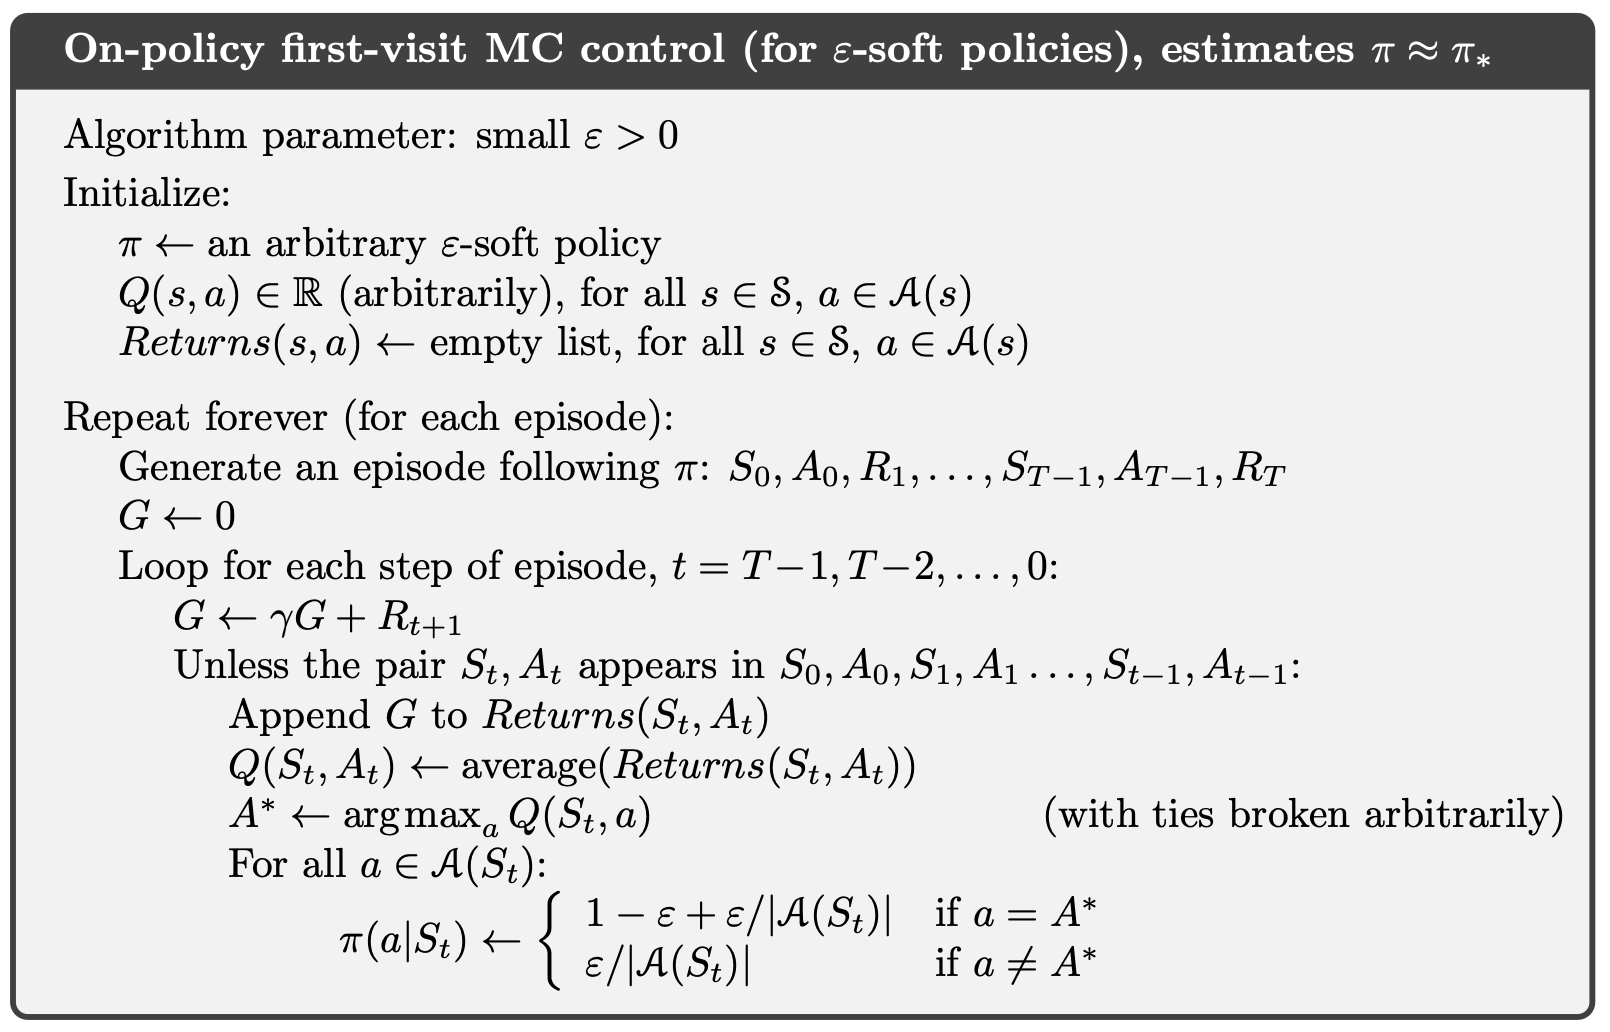


### Off-policy Monte-Carlo Control

Off-policy Monte-Carlo Control estimates the policy $\pi$'s state-action values from trajectories sampled from different policy $\mu$ by using importance sampling. 

#### Importance Sampling

Importance sampling is a technique for estimating expectation of one distribution given samples from another. 

</br>
</br>
<font size="3">
$$\begin{align}
\mathbb{E}_{X \sim P}[f(X)] = \sum P(X)f(X) & \\
\sum Q(X)\frac{P(X)}{Q(X)}f(X) \\
\mathbb{E}_{X \sim Q} [\frac{P(X)}{Q(X)}f(X)]
\end{align}$$
</font>

#### Importance-sampling ratio

We can weight return $G_t$ according to similarity between policies by multiplying relative probability of their trajectories, called **importance-sampling ratio**. The probability of a policy $\pi$ with trajectory $(S_t, A_t, S_{t+1}, A_{t+1},..., S_T)$ is 
</br>
</br>
<font size="3">
$$\begin{align}
\prod_{k=t}^{T-1} \pi(A_k|S_k)p(S_{k+1}|S_k, A_k)
\end{align}$$
</font>
where $p$ is the state-transition probability.

Thus, the importance-sampling ratio between $\pi$ and $\mu$ is 
</br>
</br>
<font size="3">
$$\begin{align}
\rho_t^T = \dfrac{\prod_{k=t}^{T-1} \pi(A_k|S_k)p(S_{k+1}|S_k, A_k)}{\prod_{k=t}^{T-1} \mu(A_k|S_k)p(S_{k+1}|S_k, A_k)} = \prod_{k=t}^{T-1}\dfrac{\pi(A_k|S_k)}{\mu(A_k|S_k)}
\end{align}$$
</font>

We can correct return $G_t$ from policy $\mu$ for policy $\pi$ by multiplying importance-sampling ratio to $G_t$.

</br>
</br>
<font size="3">
$$\begin{align}
G_t^{\frac{\pi}{\mu}} = \prod_{k=t}^{T-1}\dfrac{\pi(A_k|S_k)}{\mu(A_k|S_k)}G_t
\end{align}$$
</font>

Thus, state-action values can be updated as the following:
</br>
</br>
<font size="3">
$$\begin{align}
Q(S_t, A_t) = Q(S_t, A_t) + \alpha(G_t^{\frac{\pi}{\mu}} - Q(S_t, A_t))
\end{align}$$
</font>

Yet as importance-sampling estimator has unbounded variance, convergence of off-policy monte-carlo control can be difficult.

### On-policy Temporal-Difference Control 

As **Temporal-Difference (TD)** can be used for model-free prediction, it can be used for model-free control.


TD methods are only used for model evaluation or prediction part as it follows the pattern of **Generalized Policy Iteration (GPI)**. For policy improvement part, $\epsilon$-greedy policy or GLIE can be used.

For on-policy TD Control, **SARSA** algorithm is widely known.

#### SARSA

**SARSA** is an on-policy temporal-difference control algorithm that updates state-action values (Q-values) by quintuple of events: $(S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})$.

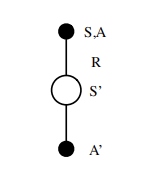

SARSA updates state-action values from $(S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})$ that sampled from **current policy $\pi$**.

</br>
</br>
<font size="3">
$$ Q(S, A) \leftarrow Q(S, A) + \alpha [R + \gamma Q(S', A') - Q(S, A)]$$
</font>

and update policy by $\epsilon$-greedy or GLIE.

SARSA converges to the optimal action-value function $q_*(s,a)$ under the following conditions.

1. policy $\pi_t(a|s)$ derived from GLIE
2. Robbins-Monro sequence of step-sizes $\alpha_t$
</br>
</br>
<font size="3">
$$ \sum^{\infty}_{t=1} \alpha_t = \infty, \sum^{\infty}_{t=1} \alpha_t^2 \leq \infty$$
</font>




### Pseudocode and Implementation of SARSA

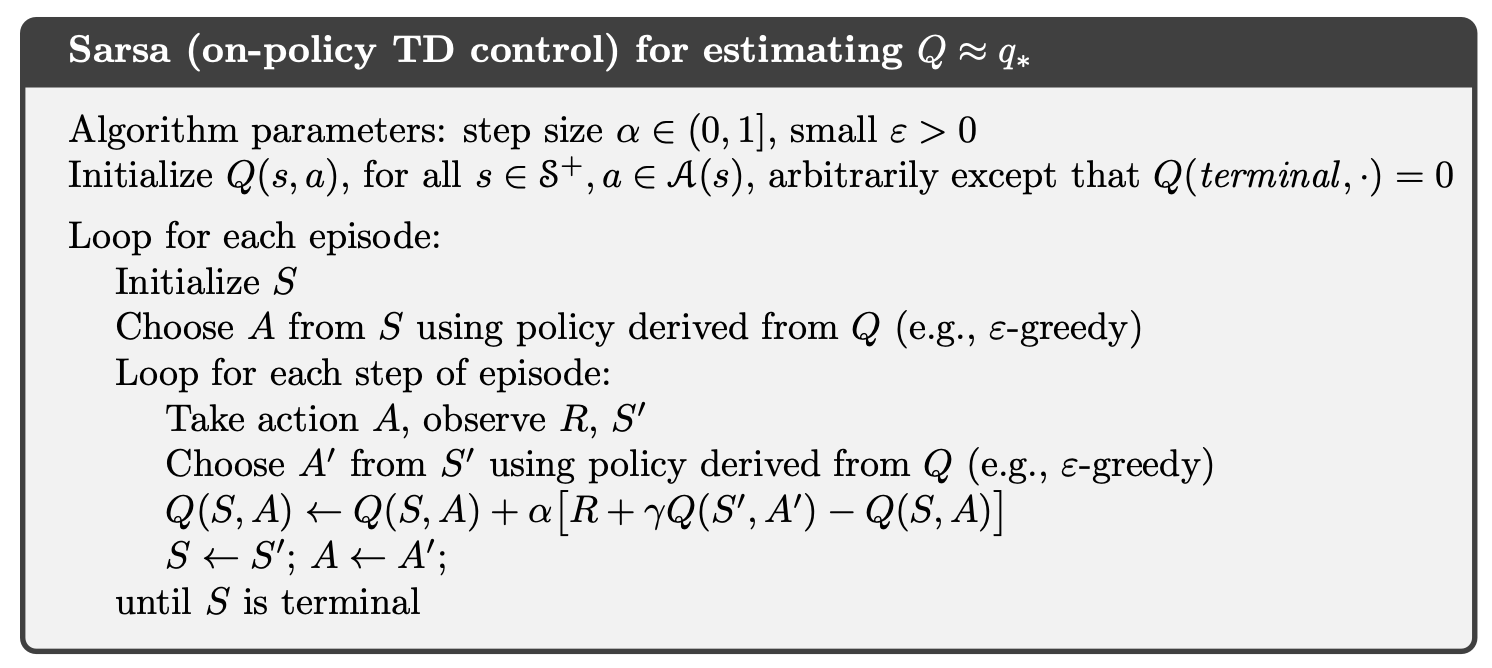

In [3]:
import gymnasium as gym
import matplotlib
import IPython
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from utils import JupyterRender

%matplotlib inline

env = gym.make("FrozenLake-v1", render_mode='rgb_array', is_slippery=False)#define the environment.
env = JupyterRender(env)


In [10]:
# SARSA in FrozenLake

class SARSA:
    def __init__(self, env, gamma=0.9, alpha=0.1, eps=0.1, render=False, max_episode=1000):
        
        self.state_dim = env.observation_space.n
        self.action_dim = env.action_space.n
        
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.eps = eps
        self.max_episode = max_episode
        
        self.render = render

        self.q = np.zeros([self.state_dim, self.action_dim])

    def action(self, s):
        if np.random.random() < self.eps:
            action = np.random.randint(low=0, high=self.action_dim - 1)
        else:
            action = np.argmax(self.q[s,:])

        return action

    def run(self):
        success = 0

        for episode in range(self.max_episode):
            observation, _ = self.env.reset()
            done = False
            episode_reward = 0
            local_step = 0

            while not done:
                action = self.action(observation)
                next_observation, reward, done, _, _ = self.env.step(action)

                # give penalty for staying in ground
                if reward == 0:
                    reward = -0.001
                    
                # give penalty for falling into the hole
                if done and next_observation != 15:
                    reward = -1
                    
                episode_reward += reward

                next_action = self.action(next_observation)
                
                #sarsa update
                self.q[observation, action] = self.q[observation, action] + self.alpha * (reward + self.gamma * self.q[next_observation, next_action] - self.q[observation, action])
                observation = next_observation
                episode_reward += reward
                local_step += 1

            print("Episode: {} -> Step: {}, Episode_reward: {}".format(episode, local_step, episode_reward))
            if episode_reward > 0:
                success += 1
                
        print("Success rate: ", success / self.max_episode)

In [11]:
sarsa_config = {
    'env': env,
    'gamma': 0.8,
    'alpha': 0.1,
    'eps': 0.1,
    'render': False,
    'max_episode': 1000
}

sarsa = SARSA(**sarsa_config)
sarsa.run()

Episode: 0 -> Step: 6, Episode_reward: -2.01
Episode: 1 -> Step: 6, Episode_reward: -2.01
Episode: 2 -> Step: 2, Episode_reward: -2.002
Episode: 3 -> Step: 16, Episode_reward: -2.0300000000000002
Episode: 4 -> Step: 4, Episode_reward: -2.0060000000000002
Episode: 5 -> Step: 12, Episode_reward: -2.0220000000000002
Episode: 6 -> Step: 35, Episode_reward: 1.932
Episode: 7 -> Step: 6, Episode_reward: -2.01
Episode: 8 -> Step: 4, Episode_reward: -2.0060000000000002
Episode: 9 -> Step: 118, Episode_reward: -2.234
Episode: 10 -> Step: 7, Episode_reward: -2.012
Episode: 11 -> Step: 8, Episode_reward: -2.0140000000000002
Episode: 12 -> Step: 19, Episode_reward: -2.036
Episode: 13 -> Step: 37, Episode_reward: -2.072
Episode: 14 -> Step: 31, Episode_reward: -2.06
Episode: 15 -> Step: 108, Episode_reward: -2.2140000000000004
Episode: 16 -> Step: 22, Episode_reward: 1.958
Episode: 17 -> Step: 78, Episode_reward: 1.8459999999999999
Episode: 18 -> Step: 28, Episode_reward: 1.946
Episode: 19 -> Step: 

Episode: 909 -> Step: 18, Episode_reward: 1.966
Episode: 910 -> Step: 21, Episode_reward: 1.96
Episode: 911 -> Step: 15, Episode_reward: 1.972
Episode: 912 -> Step: 55, Episode_reward: 1.892
Episode: 913 -> Step: 8, Episode_reward: 1.986
Episode: 914 -> Step: 5, Episode_reward: -2.008
Episode: 915 -> Step: 6, Episode_reward: 1.99
Episode: 916 -> Step: 7, Episode_reward: 1.988
Episode: 917 -> Step: 6, Episode_reward: 1.99
Episode: 918 -> Step: 8, Episode_reward: 1.986
Episode: 919 -> Step: 7, Episode_reward: 1.988
Episode: 920 -> Step: 6, Episode_reward: 1.99
Episode: 921 -> Step: 7, Episode_reward: 1.988
Episode: 922 -> Step: 3, Episode_reward: -2.004
Episode: 923 -> Step: 6, Episode_reward: 1.99
Episode: 924 -> Step: 7, Episode_reward: 1.988
Episode: 925 -> Step: 7, Episode_reward: 1.988
Episode: 926 -> Step: 3, Episode_reward: -2.004
Episode: 927 -> Step: 6, Episode_reward: 1.99
Episode: 928 -> Step: 7, Episode_reward: 1.988
Episode: 929 -> Step: 7, Episode_reward: 1.988
Episode: 930

In [12]:
sarsa.q

array([[ 3.80359836e-02,  1.97006386e-01,  1.13645819e-02,
        -6.16589495e-03],
       [ 1.33554686e-01, -9.86697205e-01,  1.85905158e-01,
        -2.22937093e-02],
       [ 1.52056541e-01,  2.54707483e-01,  1.55978138e-01,
        -7.19028339e-03],
       [ 1.59344364e-01, -5.21703100e-01,  1.38260699e-02,
        -2.58652334e-02],
       [ 1.72569824e-03,  3.16828896e-01, -5.69532790e-01,
         8.96792668e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-9.83576797e-01,  5.67264176e-01, -9.11370619e-01,
        -7.69023843e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.57441388e-01, -4.09510000e-01,  4.33669985e-01,
        -5.31768757e-04],
       [ 7.91145860e-02,  1.71747754e-01,  5.11201411e-01,
        -1.00000000e-01],
       [ 4.05701500e-01,  7.76382863e-01, -9.41850263e-01,
        -1.21680000e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      

### Off-policy Temporal-Difference Control


#### Q-learning

Q-learning is an off-policy TD control algorithm that called as one of the most important breakthroughs in reinforcement learning. 

Unlike SARSA, Q-learning requires only $(S_t, A_t, R_{t+1}, S_{t+1})$ state-action values are updated as the following:

</br>
</br>
<font size="3">
$$ Q(S, A) \leftarrow Q(S, A) + \alpha [R + \gamma \max_{a}Q(S', a) - Q(S, A)]$$
</font>

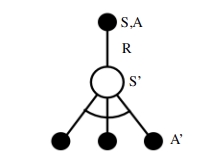

What differs Q-learning from SARSA is its target value, $R+ \gamma \max_{a}Q(S', a)$.

Target state-action values $R+ \gamma \max_{a}Q(S', a)$ means we choose policy in target value to be greedy with regard to $Q(s, a)$.

</br>
</br>
<font size="3">
$$\begin{align}
R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) & \\ = R_{t+1} + \gamma Q(S_{t+1}, \text{argmax}_{a'}Q(S_{t+1}, a')) \\ = R_{t+1} + \text{max}_{a'}\gamma Q(S_{t+1}, a')
\end{align}$$
</font>

Then policy $\pi$ is updated by $\epsilon$-greedy or GLIE. Q-learning is also proven to be converge to $q_*$ under the same condition that required for SARSA to converge. 

### Pseudocode and Implementation of Q-learning

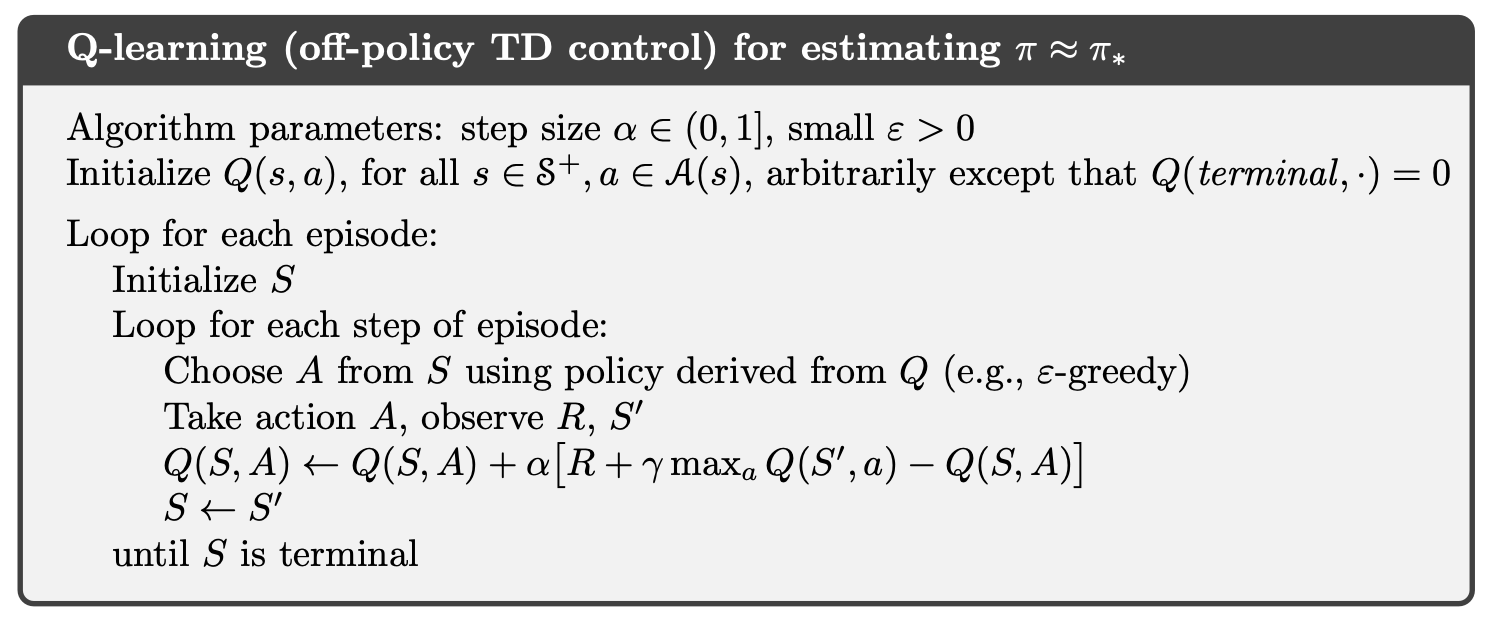

In [18]:
# Q-learning in FrozenLake


class Q_learning:
    def __init__(self, env, gamma=0.8, alpha=0.1, eps=0.1, render=False, max_episode=1000):
        self.state_dim = env.observation_space.n
        self.action_dim = env.action_space.n
        
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.eps = eps
        self.render = render
        self.max_episode = max_episode

        self.q = np.zeros([self.state_dim, self.action_dim])

    def action(self, s):
        if np.random.random() < self.eps:
            action = np.random.randint(low=0, high=self.action_dim - 1)
        else:
            action = np.argmax(self.q[s,:])

        return action

    def run(self):
        success = 0

        for episode in range(self.max_episode):
            observation, _ = env.reset()
            done = False
            episode_reward = 0
            local_step = 0

            while not done:

                action = self.action(observation)
                next_observation, reward, done, _, _ = self.env.step(action)

                # give penalty for staying in ground
                if reward == 0:
                    reward = -0.001
                    
                # give penalty for falling into the hole
                if done and next_observation != 15:
                    reward = -1
                
                self.q[observation, action] = self.q[observation, action] + self.alpha*(reward + self.gamma*np.max(self.q[next_observation,:]) - self.q[observation, action])
                observation = next_observation
                episode_reward += reward
                local_step += 1

            print("Episode: {}, Step: {}, Episode_reward: {}".format(episode, local_step, episode_reward))
            if episode_reward >= 0:
                success += 1

        print("Success: ", success / self.max_episode)

In [19]:
q_config = {
    'env': env,
    'gamma': 0.8,
    'alpha': 0.1,
    'eps': 0.1,
    'render': False,
    'max_episode': 1000
}

q_learning = Q_learning(**q_config)
q_learning.run()

Episode: 0, Step: 7, Episode_reward: -1.006
Episode: 1, Step: 5, Episode_reward: -1.004
Episode: 2, Step: 2, Episode_reward: -1.001
Episode: 3, Step: 21, Episode_reward: -1.02
Episode: 4, Step: 4, Episode_reward: -1.003
Episode: 5, Step: 18, Episode_reward: -1.017
Episode: 6, Step: 11, Episode_reward: 0.99
Episode: 7, Step: 19, Episode_reward: -1.018
Episode: 8, Step: 6, Episode_reward: -1.005
Episode: 9, Step: 11, Episode_reward: -1.01
Episode: 10, Step: 22, Episode_reward: -1.021
Episode: 11, Step: 2, Episode_reward: -1.001
Episode: 12, Step: 34, Episode_reward: 0.967
Episode: 13, Step: 46, Episode_reward: 0.955
Episode: 14, Step: 9, Episode_reward: 0.992
Episode: 15, Step: 24, Episode_reward: 0.977
Episode: 16, Step: 12, Episode_reward: 0.989
Episode: 17, Step: 18, Episode_reward: 0.983
Episode: 18, Step: 11, Episode_reward: 0.99
Episode: 19, Step: 6, Episode_reward: 0.995
Episode: 20, Step: 14, Episode_reward: 0.987
Episode: 21, Step: 7, Episode_reward: 0.994
Episode: 22, Step: 3, 

Episode: 941, Step: 6, Episode_reward: 0.995
Episode: 942, Step: 8, Episode_reward: 0.993
Episode: 943, Step: 6, Episode_reward: 0.995
Episode: 944, Step: 6, Episode_reward: 0.995
Episode: 945, Step: 6, Episode_reward: 0.995
Episode: 946, Step: 6, Episode_reward: 0.995
Episode: 947, Step: 6, Episode_reward: 0.995
Episode: 948, Step: 6, Episode_reward: 0.995
Episode: 949, Step: 6, Episode_reward: 0.995
Episode: 950, Step: 6, Episode_reward: 0.995
Episode: 951, Step: 6, Episode_reward: 0.995
Episode: 952, Step: 6, Episode_reward: 0.995
Episode: 953, Step: 2, Episode_reward: -1.001
Episode: 954, Step: 6, Episode_reward: 0.995
Episode: 955, Step: 11, Episode_reward: 0.99
Episode: 956, Step: 6, Episode_reward: 0.995
Episode: 957, Step: 6, Episode_reward: 0.995
Episode: 958, Step: 6, Episode_reward: 0.995
Episode: 959, Step: 8, Episode_reward: 0.993
Episode: 960, Step: 8, Episode_reward: 0.993
Episode: 961, Step: 5, Episode_reward: -1.004
Episode: 962, Step: 6, Episode_reward: 0.995
Episode:

In [20]:
q_learning.q

array([[ 2.36230702e-01,  3.24318400e-01,  1.68959081e-01,
        -1.52432335e-03],
       [ 2.46365385e-01, -2.71000000e-01, -1.13671298e-04,
        -1.23179029e-03],
       [-8.80494133e-04,  1.10944021e-02, -8.58814161e-04,
        -7.46184887e-04],
       [-8.32678632e-04, -1.00000000e-01, -8.10851381e-04,
        -8.31261189e-04],
       [ 3.09745870e-01,  4.06648000e-01, -9.77471600e-01,
        -1.10007084e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.00000000e-01,  1.10040463e-01, -1.00000000e-01,
        -3.62438600e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.89854300e-01, -9.92930350e-01,  5.09560000e-01,
        -6.61099187e-04],
       [ 3.83092030e-01,  6.38200000e-01,  5.06032808e-01,
        -1.00000000e-01],
       [ 1.37226385e-01,  7.46552773e-01, -3.43900000e-01,
        -1.09734400e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      